 # AI Methods
 
 ## Quick Overview of the Linear Model. 
 
 

## Linear Regression

In [1]:
#import packages that will or may be needed
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression

In [2]:
#import the homes data file and assign a variable to it 
homes = pd.read_csv("homesadj.csv")
print(homes)

          folio              site_address   SiteCity site_zip  sale_date  \
0     880790710    15941 FISHHAWK VIEW DR     LITHIA    33547   8/5/2016   
1     880790706    15945 FISHHAWK VIEW DR     LITHIA    33547  4/28/2016   
2     880790756    15944 FISHHAWK VIEW DR     LITHIA    33547   8/5/2016   
3     741248296      6214 OSPREY LAKE CIR  RIVERVIEW    33578  2/22/2018   
4     880790734    15977 FISHHAWK VIEW DR     LITHIA    33547  8/11/2016   
...         ...                       ...        ...      ...        ...   
7875  880800818  5010 SANDERLING RIDGE DR     LITHIA    33547  6/22/2018   
7876  880800818  5010 SANDERLING RIDGE DR     LITHIA    33547  6/22/2018   
7877  870981224      3331 STONEBRIDGE TRL    VALRICO    33596  5/20/2019   
7878  880921584          5717 HAWKLAKE RD     LITHIA    33547   4/9/2020   
7879  861420298   215 ENGLISH HERITAGE PL      DOVER    33527  8/30/2017   

      sale_price  bed  bath  year_built   sq_ft  total_sq_ft  \
0         117000  2.0  

In [3]:
#Here, we are just looking at the null values and data type so we can clean the data before creating visuals
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7880 entries, 0 to 7879
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   folio          7880 non-null   int64  
 1   site_address   7880 non-null   object 
 2   SiteCity       7879 non-null   object 
 3   site_zip       7880 non-null   object 
 4   sale_date      7880 non-null   object 
 5   sale_price     7880 non-null   int64  
 6   bed            7807 non-null   float64
 7   bath           7807 non-null   float64
 8   year_built     7880 non-null   int64  
 9   sq_ft          7814 non-null   float64
 10  total_sq_ft    7814 non-null   float64
 11  neighborhood   7880 non-null   object 
 12  total_stories  7815 non-null   float64
 13  qualified      7880 non-null   object 
 14  acreage        7880 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 923.6+ KB


In [4]:
#this is just looking at the raw data size (rows,columns)
homes.shape

(7880, 15)

In [5]:
#here I am just looking at the null values in each column
homes.isnull().sum()

folio             0
site_address      0
SiteCity          1
site_zip          0
sale_date         0
sale_price        0
bed              73
bath             73
year_built        0
sq_ft            66
total_sq_ft      66
neighborhood      0
total_stories    65
qualified         0
acreage           0
dtype: int64

In [6]:
#Here I am just filtering the data to only contain values that have a home sales price
#Challenge 1: There are values that have home prices less than 10,000 USD and home stories equal to 0 which is not realistic an could have been recorded in error
#Solution 1:The code below is going to filter the homes data to only contain homes that are greater thn $10,000 and have
#home stories greater than 0
homes = homes.loc[(homes.sale_price>10000)&(homes.total_stories>0)]

In [7]:
#Now that those changes were made we can see that the raw data has been cut down 820 rows
homes.shape

(7060, 15)

In [8]:
#We are dropping rows with null values
#Challenge 2: There are a lot of missing values in the data that can be an issue when making models 
#Solution 2: We are going to get rid of them with the code below

homes=homes.dropna()

In [9]:
#with this change we now have a data set with 7050 rows which is still a lot to see a pattern in home characterisitc and sales price
homes.shape

(7050, 15)

In [10]:
#Here we are just double checking that all the null value are gone
homes.isnull().sum()

folio            0
site_address     0
SiteCity         0
site_zip         0
sale_date        0
sale_price       0
bed              0
bath             0
year_built       0
sq_ft            0
total_sq_ft      0
neighborhood     0
total_stories    0
qualified        0
acreage          0
dtype: int64

In [11]:
#printing the first few rows of columns: bed, bath, year_built, sq_ft, total_sq_ft ,total_stories, acreage, we are looking at there 
#variables because they are quantitative and easiest to look at the impact of sales price
x = homes[['bed','bath', 'year_built','sq_ft','total_sq_ft','total_stories','acreage']]
x.head()

,bed,bath,year_built,sq_ft,total_sq_ft,total_stories,acreage
0,2.0,2.5,2012,1216.0,1280.0,2.0,0.02
1,2.0,2.5,2012,1216.0,1280.0,2.0,0.02
2,2.0,2.5,2011,1216.0,1280.0,2.0,0.02
3,3.0,2.5,2003,1506.0,1640.0,2.0,0.02
4,2.0,2.5,2012,1216.0,1280.0,2.0,0.02


In [12]:
#Printing sales price' columns
y=homes['sale_price']
y.head()

0    117000
1    118000
2    121000
3    123000
4    125000
Name: sale_price, dtype: int64

In [13]:
#We are prinitng the slope of each of variable (bed','bath', 'year_built','sq_ft','total_sq_ft','total_stories','acreage)
#and looking at it's relationship to sales price!
#We can see that total_stories foot has the biggest impact on the price of a home
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
print(model.coef_)

[-1.18416730e+04  2.08323864e+04  2.00534269e+03  2.53923831e+01
  9.24688197e+01 -3.31636173e+04  6.54736133e+03]


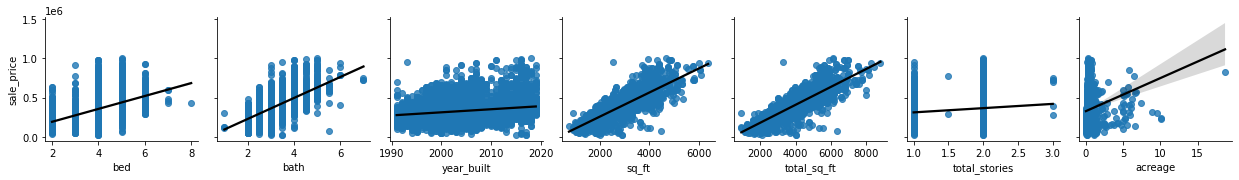

In [14]:
sns.pairplot(homes,
             x_vars=['bed','bath','year_built','sq_ft','total_sq_ft',"total_stories",'acreage'],
             y_vars=['sale_price'],
             kind='reg', plot_kws={'line_kws':{'color':'black'}})

The heatmap below looks at the relationship between quantitative home charactistics and sales prices, from the visual below you and see that home stories has the biggest impact on price so that is something to be aware of when puchasing a home if you are budgeting.

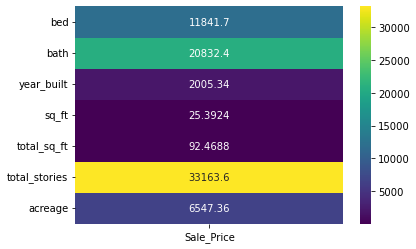

In [15]:
#importing the necessary packages again
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#taking in the absolute value of the slope to see which characteristic has the strongest effect on price
df = pd.DataFrame({"Sale_Price": [1.18416730e+04, 2.08323864e+04,  2.00534269e+03,  2.53923831e+01,
                                  9.24688197e+01, 3.31636173e+04,  6.54736133e+03]},
                  index=["bed", "bath", "year_built", "sq_ft", "total_sq_ft","total_stories","acreage"])

sns.heatmap(df, annot=True, fmt="g", cmap='viridis')

plt.show()

-------------------------------------------------------------------------------------------------------------------------------

Creating a visual displaying of the relationship between the zip code and average price

In [16]:
#looking at how many homes are catergorized into each zip code
pd.value_counts(homes['site_zip'])

33547         4820
33596         1230
33578          672
33527          115
33511          104
99999           37
33567           35
33547-          28
33547-4886       2
33596-           2
33578-           2
33594            2
33578-8379       1
Name: site_zip, dtype: int64

In [17]:
# Replacing values in data for a given column
homes['site_zip']=homes['site_zip'].replace({'33547-    ':'33547', 
                                        '33547-4886':'33547',
                                        '33578-8379':'33578',
                                        '33569-5294':'33569',
                                        '33578-    ':'33578',
                                        '33596-    ':'33569',
                                        '99999':'no_zip'}, 
                                         inplace=False)

In [18]:
#I have changed the column and edited the zip code values to associate one home with one sip code rather than a range
pd.value_counts(homes['site_zip'])

33547     4850
33596     1230
33578      675
33527      115
33511      104
no_zip      37
33567       35
33569        2
33594        2
Name: site_zip, dtype: int64

In [19]:
#Displaying the columns that show the fixed zip code of each home and their corresponding price
zip_sale=homes[['site_zip','sale_price']]
zip_sale

,site_zip,sale_price
0,33547,117000
1,33547,118000
2,33547,121000
3,33578,123000
4,33547,125000
...,...,...
7875,33547,260000
7876,33547,260000
7877,33596,260000
7878,33547,260000


In [32]:
#The codes below are used to find the mean sales price based on specific zip codes
homes.loc[homes['site_zip'] =='33547','sale_price'].mean()

364976.61814432987

In [33]:
homes.loc[homes['site_zip'] =='33596','sale_price'].mean()

310043.6235772358

In [22]:
homes.loc[homes['site_zip'] =='33578','sale_price'].mean()

217811.11111111112

In [23]:
homes.loc[homes['site_zip'] =='33527','sale_price'].mean()

243258.26086956522

In [24]:
homes.loc[homes['site_zip'] =='33511','sale_price'].mean()

350786.53846153844

In [25]:
homes.loc[homes['site_zip'] =='33567','sale_price'].mean()

196037.9714285714

In [26]:
homes.loc[homes['site_zip'] =='33569','sale_price'].mean()

286500.0

In [27]:
homes.loc[homes['site_zip'] =='33594','sale_price'].mean()

330750.0

In [30]:
# The zip code 99999 indicates a home cannot be accuately placed so the visual will not include those homes
homes.loc[homes['site_zip'] =='no_zip','sale_price'].mean()

291672.97297297296

Below is a visual of the average home price based on zip code

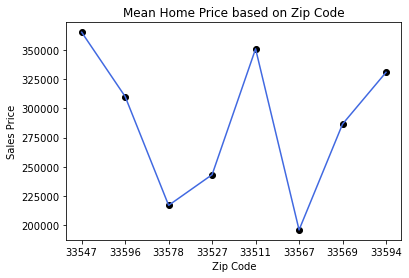

In [31]:
zip = ['33547','33596','33578','33527','33511','33567','33569','33594']      
mean_zip_price=[364976.61814432987,310043.6235772358,217044.85294117648,
                243258.26086956522,350786.53846153844,196037.9714285714,
                286500.0,330750.0]
plt.scatter(zip, mean_zip_price, color='black')
plt.plot(zip, mean_zip_price, color='royalblue')
plt.xlabel('Zip Code')
plt.ylabel('Sales Price')
plt.title('Mean Home Price based on Zip Code')
plt.show()

Findings: Zip codes 33547,33511 and 33594 have homes with an average price more than the others

Creating a bar chart that displays qualified and unquaified homes

-Qualified homes include interest and points you pay on a loan secured by your main home or a second home. Your main home is where you live most of the time, such as a house, cooperative apartment, condominium, mobile home, house trailer, or houseboat. It must have sleeping, cooking, and toilet facilities.
(https://www.irs.gov/taxtopics/tc505)

-"An unqualified sale is a sale transaction in which a property is not sold at full market value.
For eg., when a property is foreclosed and sold or it is transferred to a relative, the full market value is 
not arrived at in the transaction. These transactions are known as unqualified sales." 
(https://www.mortgagefit.com/know-how/unqualified-sale.html)

In [34]:
#Printing the column of homes that are qualified or unqualified
qualified=homes[['qualified']]
qualified

,qualified
0,Qualified
1,Qualified
2,Qualified
3,Qualified
4,Qualified
...,...
7875,Qualified
7876,Unqualified
7877,Qualified
7878,Qualified


In [35]:
#counting up the homes that are considered qualifed or unqualified
pd.value_counts(homes['qualified'])

Qualified      6901
Unqualified     149
Name: qualified, dtype: int64

Text(0, 0.5, 'Count')

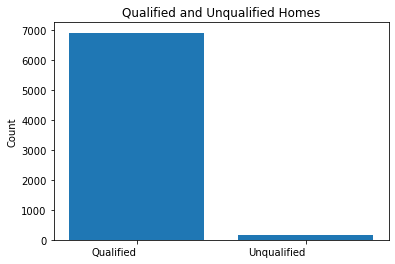

In [36]:
#Creating a visual that displays the information
xvar = ['Qualified', 'Unqualified']
count = (6901,149)
plt.bar(xvar,count)  
plt.xticks(ha='right')
figsize=(20,20)
plt.title('Qualified and Unqualified Homes')
plt.ylabel('Count')

In [50]:
#Finding the mean price or qualified versus unqualified homes

In [37]:
Q_homes=homes.loc[homes['qualified'] =='Qualified','sale_price'].mean()
Q_homes

340015.98087233736

In [38]:
UnQ_homes=homes.loc[homes['qualified'] =='Unqualified','sale_price'].mean()
UnQ_homes

237628.8590604027